# **Business Problem Understanding**
Dream Housing Finance company deais in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv('LoanData.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# **Data Understanding**
 - Loan_ID  ---> Unique loan id
 - Gender  ---> Male / female
 - Married  ---> Applicant Married or not
 - Dependents  ---> Number of dependents
 - Education  ---> Applicants Education
 - Self_Employed  ---> Self employed or not
 - ApplicantIncome  ---> Applicant income
 - CoapplicantIncome  ---> Coapplicant income
 - LoanAmount  ---> Loan amount in thousands
 - Loan_Amount_Term  ---> Loan amount term in months
 - Credit_History  ---> Credit history meets guidlines
 - Property_Area  ---> Urban or rural area
 - Loan_Status  ---> Loan approved or not **Target Varible**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
data['Loan_ID'].nunique()

614

**Drop Unimportant columns as per the Feature selection (Filter Methods)**

In [14]:
data.drop(columns=['Loan_ID'],inplace= True)

In [15]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [16]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [17]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [19]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [20]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [21]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [22]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [23]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [24]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [25]:
data['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [26]:
data['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

**Create New columns as per the Reqirement**

In [27]:
data['Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [28]:
data['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [29]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [30]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [31]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [32]:
data['Credit_History']= data['Credit_History'].replace({1:'good',0:'bad'})

In [33]:
data["Credit_History"].unique()

array(['good', 'bad', nan], dtype=object)

In [34]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [35]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [36]:
data['Property_Area'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object>

In [37]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [38]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [39]:
continous = ['Income','LoanAmount']

discrete_categorical = ['Gender', 'Married', 'Education',
                        'Self_Employed', 'Credit_History',
                        'Property_Area', 'Loan_Status']

discrete_count =['Dependents','Loan_Amount_Term']

**Exploratory Data Analysis (EDA)**

For Continous Varible

In [40]:
data[continous].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,614.0,7024.705081,6458.663872,1442.0,4166.0,5416.5,7521.75,81000.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0


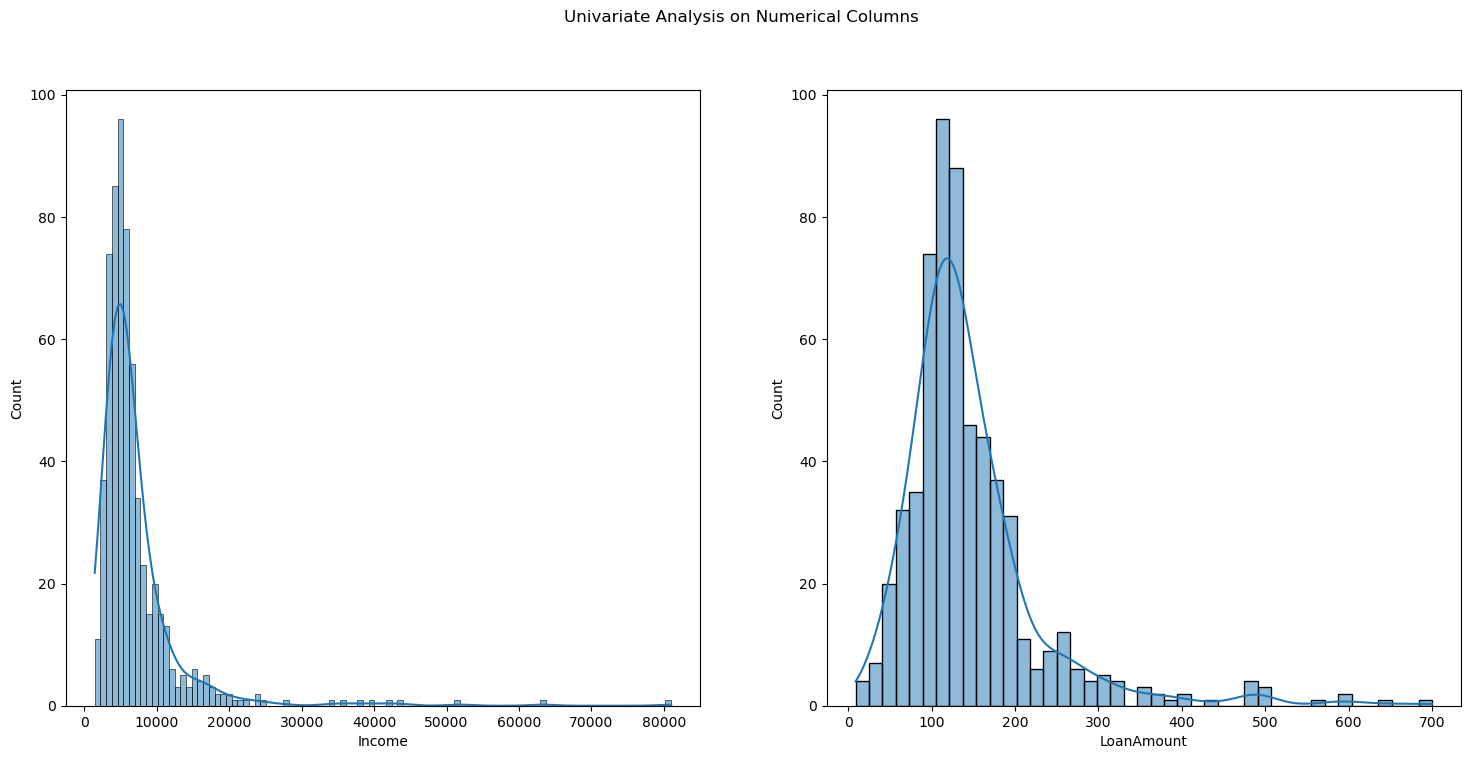

In [41]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(data['Income'],kde=True)

plt.subplot(1,2,2)
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [42]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

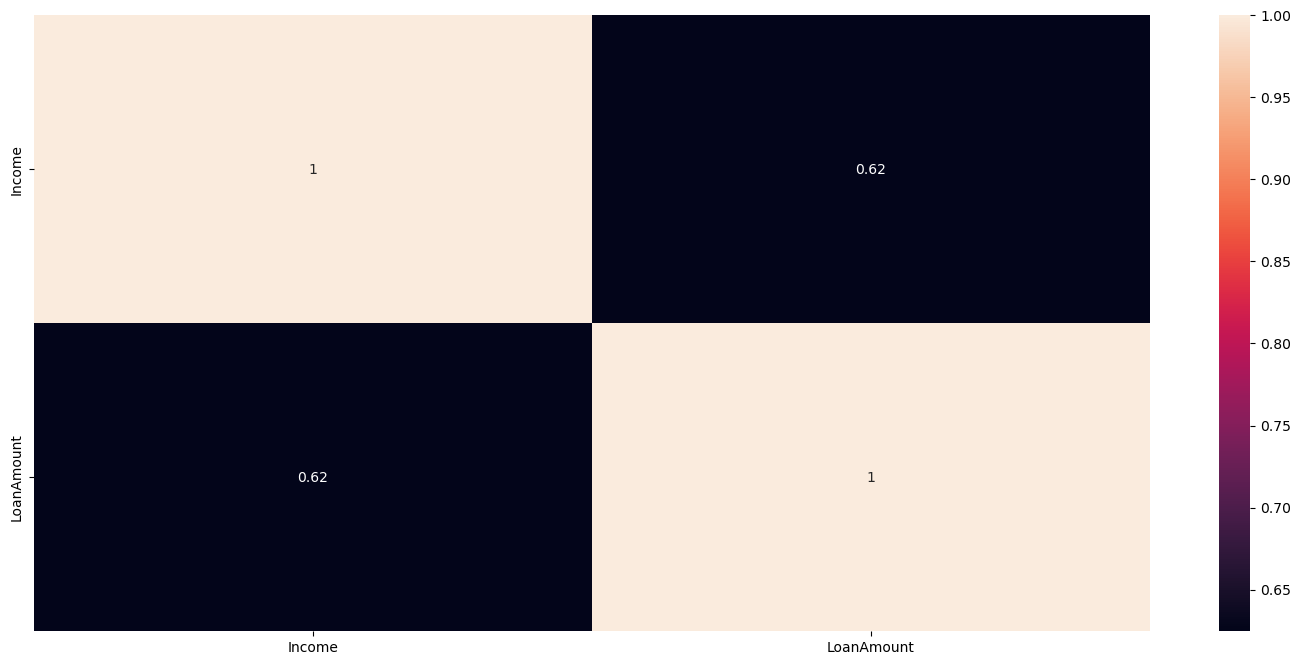

In [43]:
sns.heatmap(data[continous].corr(), annot=True)
plt.show()

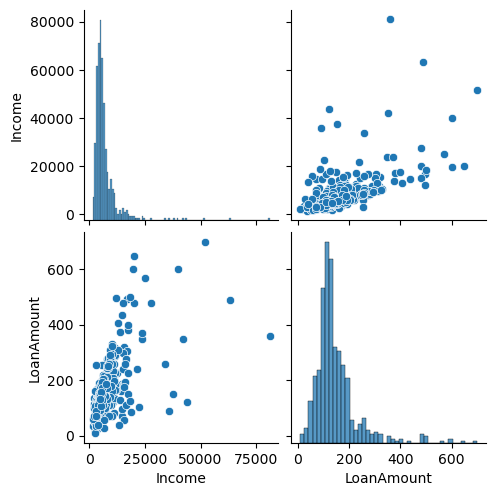

In [44]:
sns.pairplot(data[continous])
plt.show()

For discrete Varible

In [45]:
data[discrete_categorical].describe().T

,count,unique,top,freq
Gender,601,2,Male,489
Married,611,2,Yes,398
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Credit_History,564,2,good,475
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


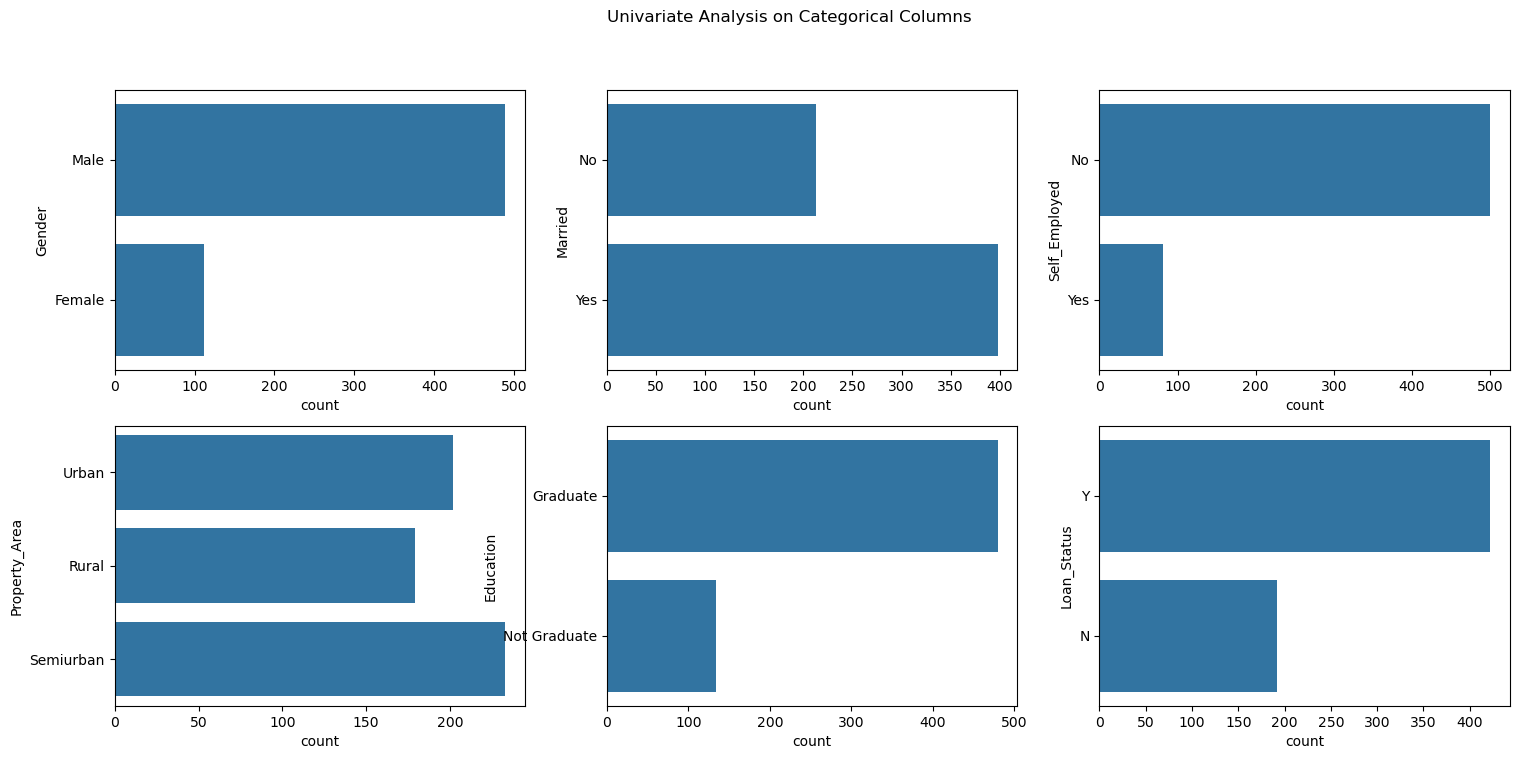

In [46]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2,3,1)
sns.countplot(data['Gender'])

plt.subplot(2,3,2)
sns.countplot(data['Married'])

plt.subplot(2,3,3)
sns.countplot(data['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(data['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(data['Education'])

plt.subplot(2,3,6)
sns.countplot(data['Loan_Status'])

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

**Checking the Missing values**

In [47]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

**Checking for skewness**

In [48]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

**Checking the Outliers**

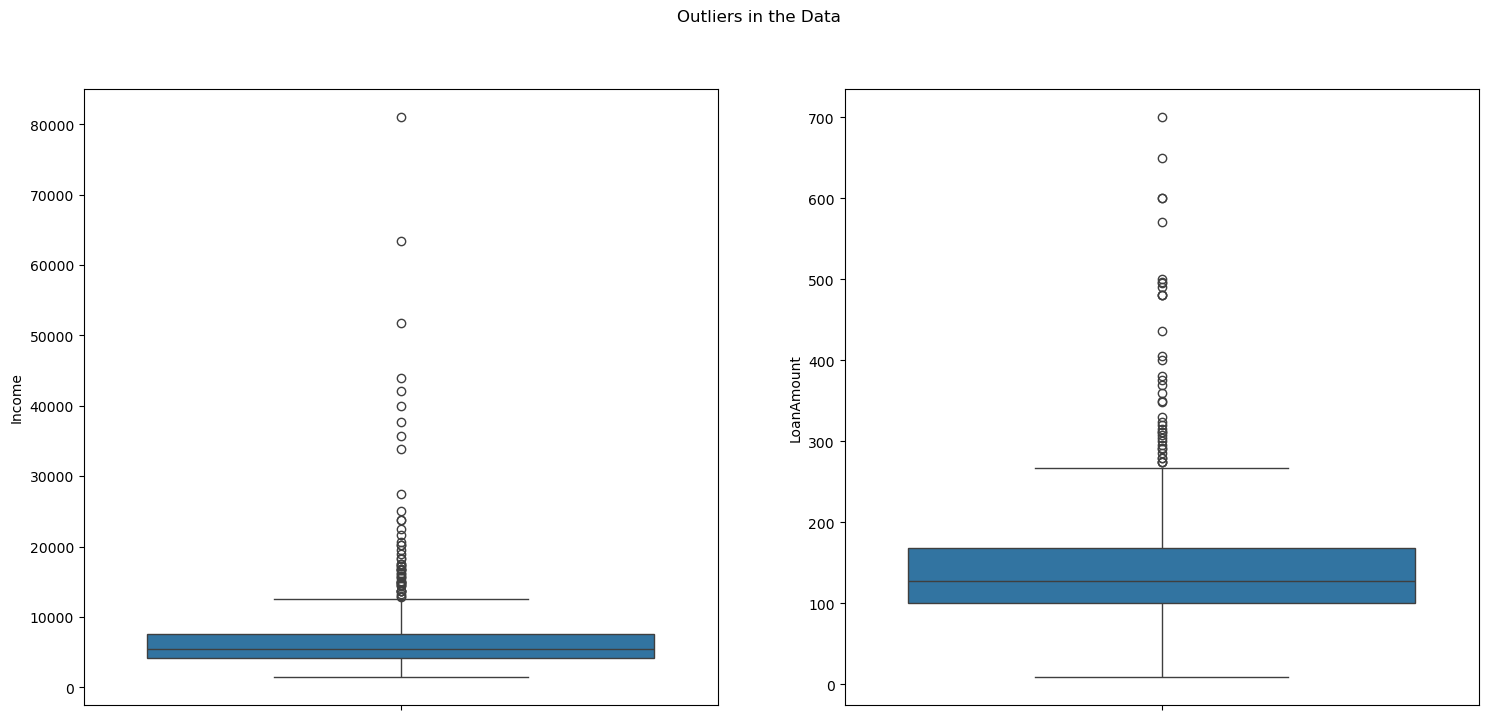

In [49]:
# Visulize using boxplot

plt.subplot(1,2,1)
sns.boxplot(data['Income'])

plt.subplot(1,2,2)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers in the Data')
plt.show()

# **Step-3 Data Preprocessing**
1. **Data Cleaning**
    - Wrong Data 
    - Missing Values
    - Wrong Data Type
    - Duplicate Data
    - Outliers
2. **Data Wrangling**
    - Transformation (applicable on continous)
    - Scaling (applicable on continous)
    - Encoding (applicable on discrete categorical)
    - **Dont Apply Data Wrangling on count Varible**

**Worng Data Treatement**

In [50]:
data['Dependents']=data['Dependents'].replace({"3+":3})

**Missing Value Treatment**

In [51]:
data['Dependents']=data['Dependents'].fillna(0)

data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data = data.dropna(subset=["Income",'LoanAmount','Loan_Amount_Term','Credit_History'])

**Data Type Conversion**

In [52]:
data['Dependents'] = data['Dependents'].astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

**Outlier Treatment**

In [53]:
# outlier should be retrained

**Transformation**

In [54]:
from scipy.stats import boxcox
data['Income'],a = boxcox(data['Income'])
data['LoanAmount'],c = boxcox(data['LoanAmount'])

In [55]:
data[continous].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

**Encoding**

In [56]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female':0})
data['Married'] = data['Married'].replace({'Yes': 1, 'No':0})
data['Education'] = data['Education'].replace({'Graduate': 1, 'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes':1, 'No':0})
data['Property_Area'] = data['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban':2})
data['Credit_History'] = data['Credit_History'].replace({'good': 1, 'bad' : 0})
data['Loan_Status'] = data['Loan_Status'].replace({'Y':1, 'N':0})

In [57]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,360,1,0,0,1.864967
2,1,1,0,1,1,5.202610,360,1,2,1,1.856556
3,1,1,0,0,0,6.138816,360,1,2,1,1.862802
4,1,0,0,1,0,6.401083,360,1,2,1,1.864819
5,1,1,2,1,1,7.481931,360,1,2,1,1.868932


**X & Y**

In [58]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

**Best Random State**

In [59]:
Train = []
CV = []

for i in range (0,100):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = i)
    
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    ypred_train = model.predict(X_train)
    
    from sklearn.metrics import r2_score
    Train.append(r2_score(y_train,ypred_train))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(model,X_train,y_train,cv=5).mean())

em = pd.DataFrame({'Train':Train,'CV':CV})
gm = em[(abs(em['Train']-em['CV'])<=0.05)]
rs = gm [gm['CV']==gm['CV'].max()].index.tolist()[0]
print('Best Random State Number :',rs)

Best Random State Number : 10


**Train Test Split**

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 10)

# **Modelling**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Logistic Regression**

In [62]:
# Modelling
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

# Predict & Evaluate on train data
y_pred_train = logistic_model.predict(X_train) # default thresold value is 0.5
print("Train Accuracy :", accuracy_score(y_train, y_pred_train))

# Cross Validation on train data
print('CV Score :', cross_val_score(logistic_model,X_train,y_train,cv=5,scoring="accuracy").mean())

# Predict on test data
y_pred_test = logistic_model.predict(X_test)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Train Accuracy : 0.8226950354609929
CV Score : 0.817955182072829
Test Accuracy : 0.7735849056603774


In [63]:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[[14 21]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.82      0.40      0.54        35
           1       0.76      0.96      0.85        71

    accuracy                           0.77       106
   macro avg       0.79      0.68      0.69       106
weighted avg       0.78      0.77      0.75       106



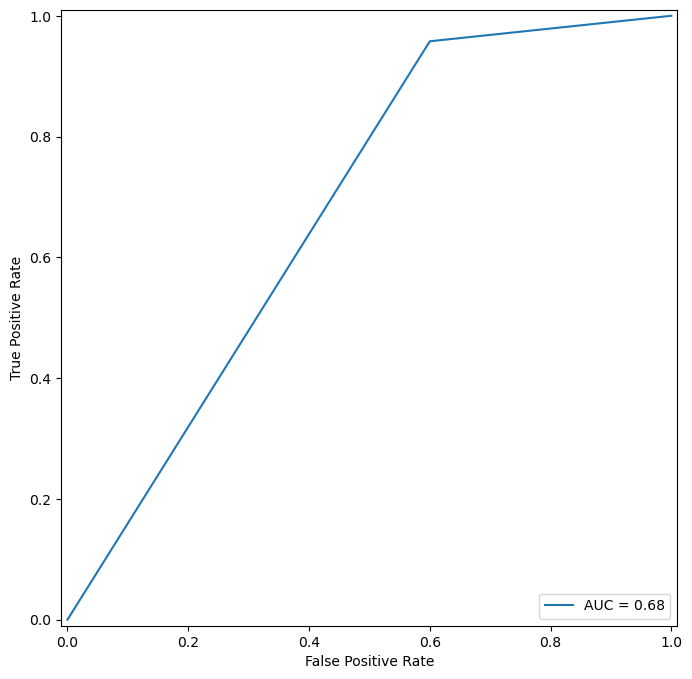

In [64]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay,roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [65]:
print ('AUC Score:',roc_auc_score(y_test,y_pred_test))

AUC Score: 0.6788732394366197


**KNN**

In [66]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the estimator and parameter grid
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 50)), 'p': [1, 2]}

# Perform Grid Search
knn_grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# KNN Model with Best Parameters
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=12, p=1)

In [67]:
# Modelling
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train,y_train)

# Predicting
y_pred = knn_model.predict(X_train)
print ("KNN Model Accuracy:", accuracy_score(y_train, y_pred))

#Cross Validation on Train data
print ("KNN Model Cross Validation Accuracy:", cross_val_score(knn_model, X_train, y_train, cv=5, scoring="accuracy").mean())

# Predicting on Test data
y_pred_test = knn_model.predict(X_test)
print ("KNN Model Test Accuracy:", accuracy_score(y_test, y_pred_test))

KNN Model Accuracy: 0.7966903073286052
KNN Model Cross Validation Accuracy: 0.7611484593837534
KNN Model Test Accuracy: 0.7264150943396226


**SVM**

In [68]:
# # Hyperparameter Tuning
# from sklearn.svm import SVC

# # Define the estimator and parameter grid
# estimator = SVC()
# param_grid = {'C': [0.01,0.1,1], 'kernel': ['linear', 'rbf', 'poly','sigmoid']}

# # Perform Grid Search
# svm_grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
# svm_grid.fit(X_train, y_train)

# # KNN Model with Best Parameters
# svm_grid.best_estimator_

In [69]:
# # Modelling
# svm_model = svm_grid.best_estimator_
# svm_model.fit(X_train,y_train)

# # Predicting
# y_pred = svm_model.predict(X_train)
# print ("SVM Model Accuracy:", accuracy_score(y_train, y_pred))

# #Cross Validation on Train data
# print ("SVM Model Cross Validation Accuracy:", cross_val_score(svm_model, X_train, y_train, cv=5, scoring="accuracy").mean())

# # Predicting on Test data
# y_pred_test = svm_model.predict(X_test)
# print ("SVM Model Test Accuracy:", accuracy_score(y_test, y_pred_test))

**Decision Tree**

In [70]:
model = DecisionTreeClassifier(random_state = True)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=True)

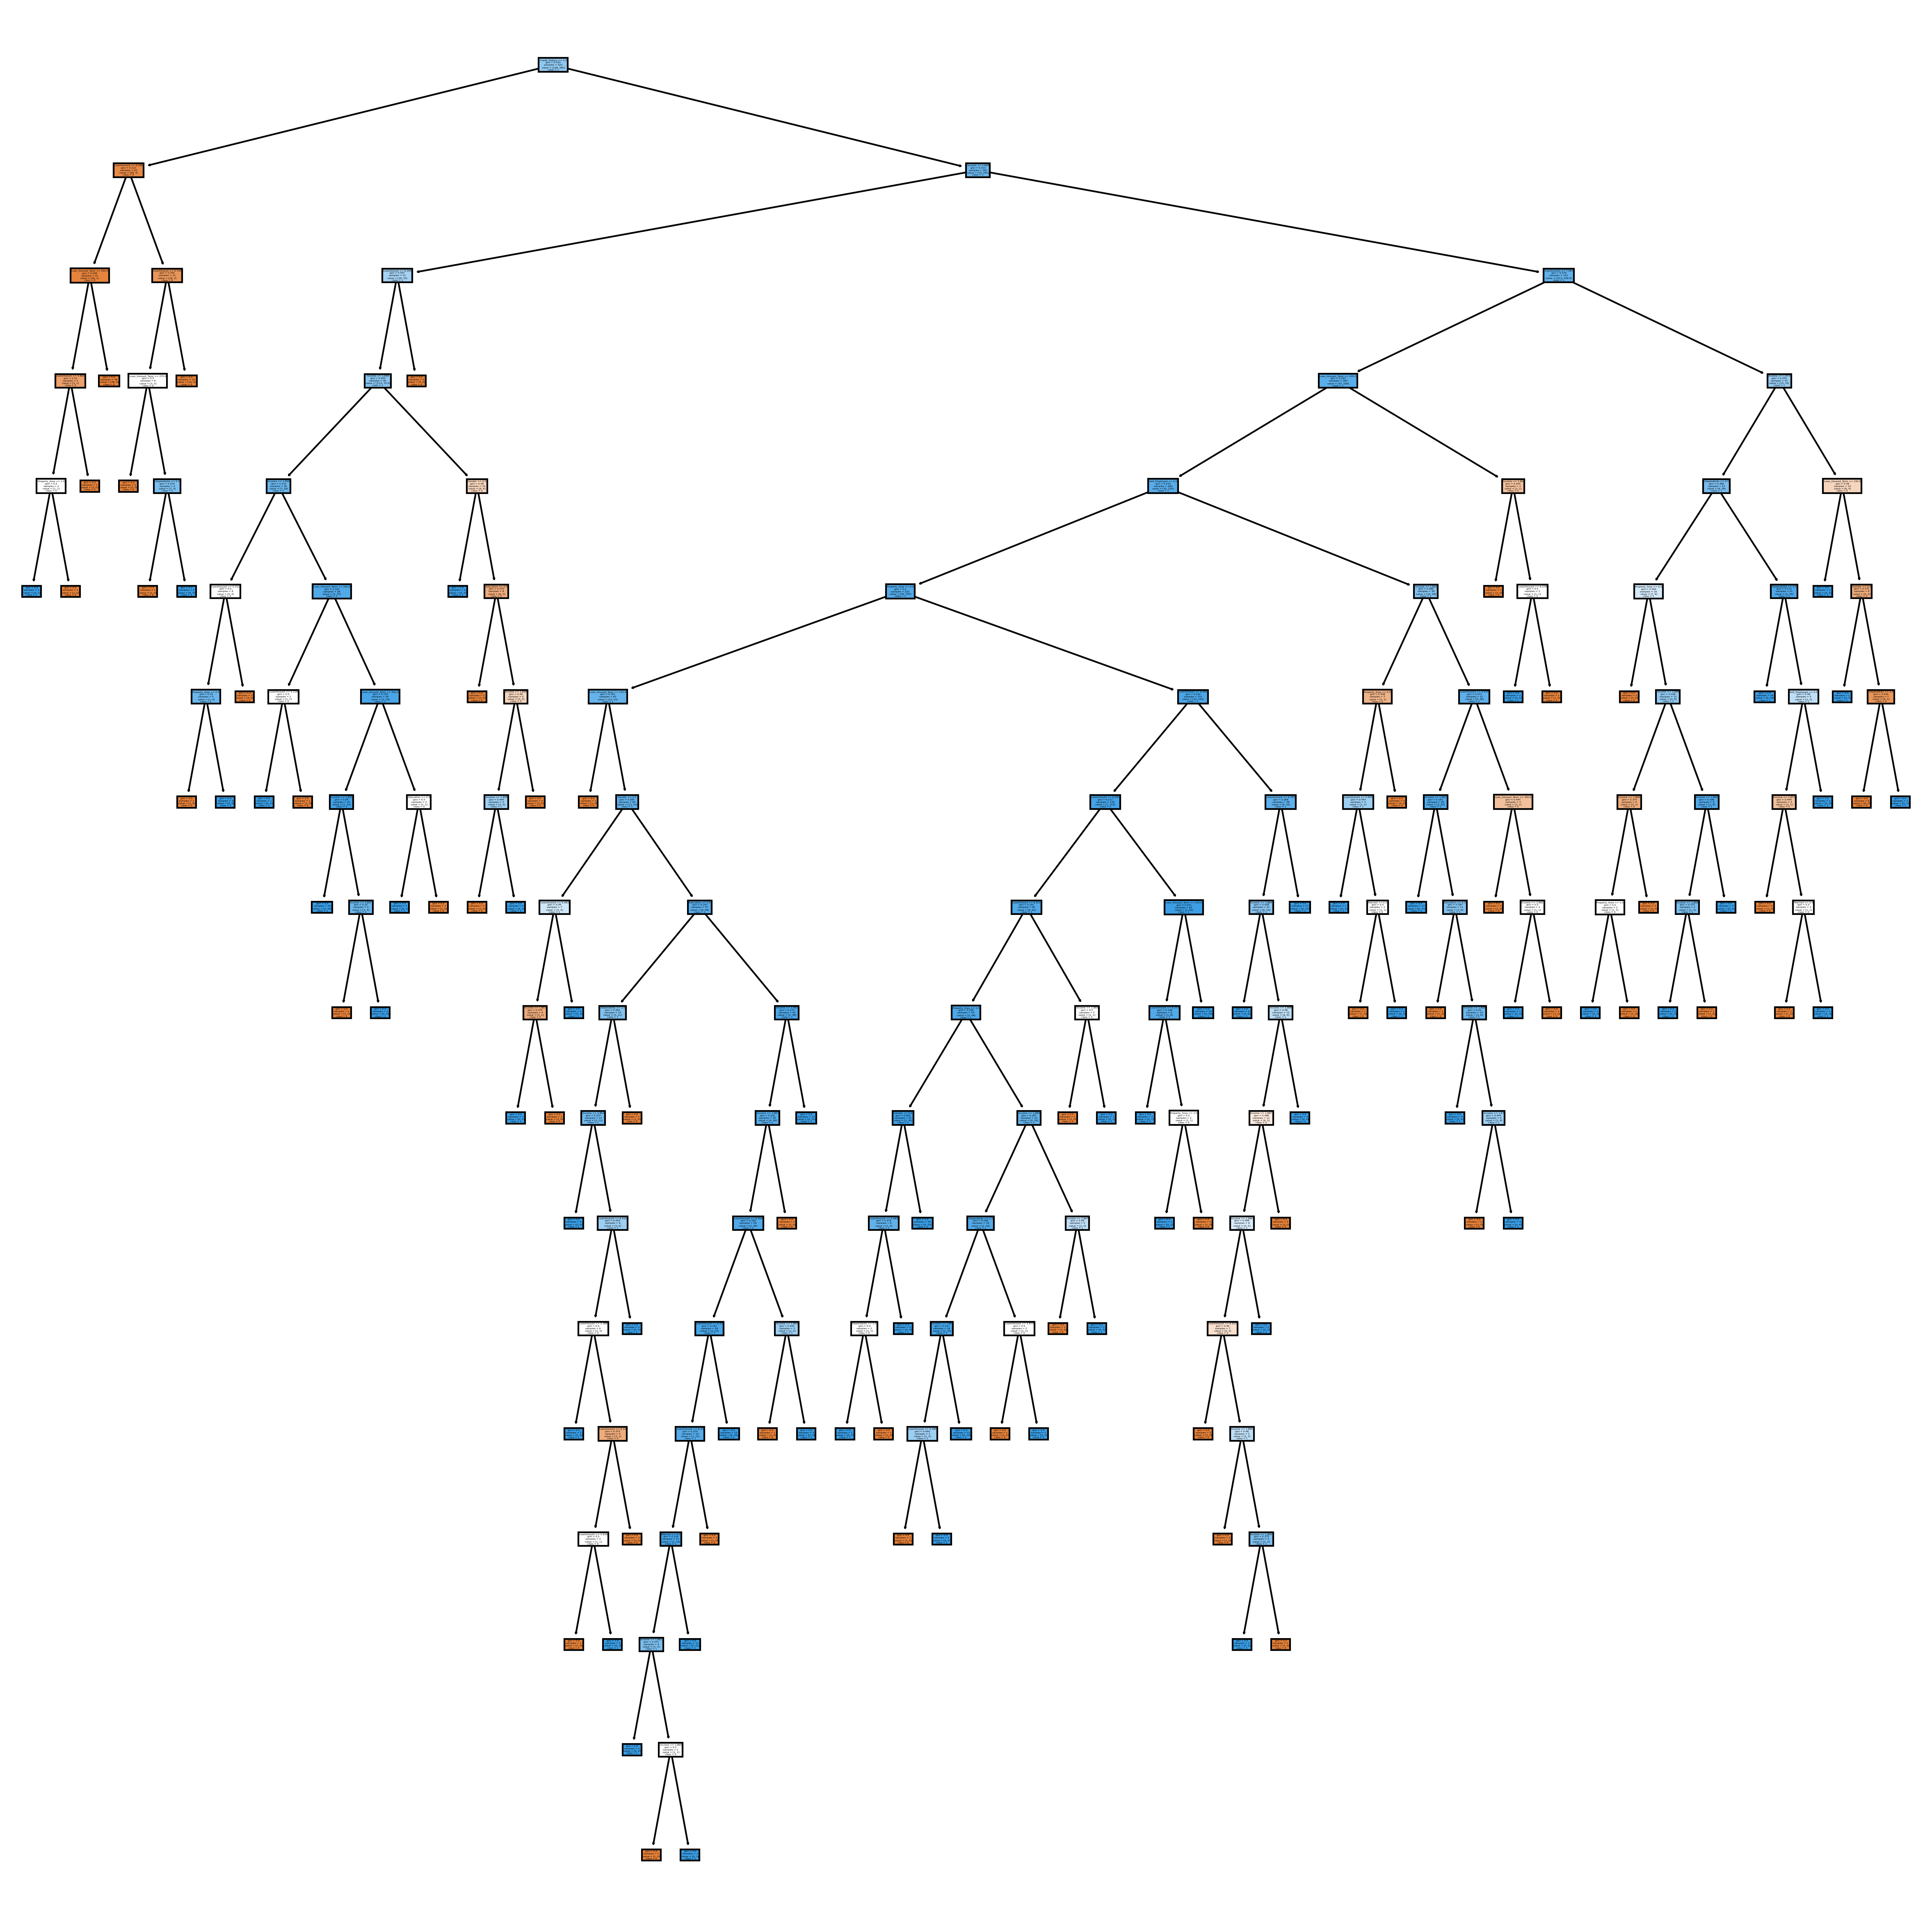

In [71]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
          feature_names=X_train.columns.tolist(),
          class_names=['0','1'])
plt.show()

In [72]:
# Hpper Parameter tuning
estimator = DecisionTreeClassifier(random_state=True)

param_grid = {'criterion':['gini','entropy'],
              'max_depth':list(range(1,16))}

dt_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [75]:
# Important Features 
feats_ab = pd.DataFrame(data=dt.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])

imporatant_features_dt = feats_ab[feats_ab['Importance']>0].index.tolist()
imporatant_features_dt

['Credit_History']

**Creating Decision tree model with important parameters and important features**

In [84]:
# Selection train & Test Data
X_train_dt = X_train[imporatant_features_dt]
X_test_dt = X_test[imporatant_features_dt]

# Modelling 
dt = dt_grid.best_estimator_
dt.fit(X_train_dt,y_train)

# Evaluaion
ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

print ("Train Accuracy :",accuracy_score(y_train,ypred_train))
print ("CV Score :",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring='accuracy').mean())
print ("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8250591016548463
CV Score : 0.8250420168067226
Test Accuracy : 0.7735849056603774


**Random Forest Classifier**

In [85]:
# Hyper parameter tunin
estimator = RandomForestClassifier(random_state=True)

param_grid = {'n_estimators':list(range(1,51))}

rf_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)

rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=20, random_state=True)

In [86]:
# Important features
feats_ab = pd.DataFrame(data = rf.feature_importances_,
                        index=X.columns,
                        columns = ['Importance'])

imporatant_features_rf = feats_ab[feats_ab['Importance']>0].index.tolist()
imporatant_features_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [ ]:
X_train_rf = X_train[imporatant_features_rf]
X_test_rf = X_test[imporatant_features_rf]

#Modelling
rf = rf_grid.best_estimator_
rf.fit(X_train_rf,y__train)

# Evaluation
ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

print ("Train Accuracy :",accuracy_score(y_train,ypred_train))
print ("CV Score :",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring='accuracy').mean())
print ("Test Accuracy :",accuracy_score(y_test,ypred_test))